In [21]:
%pip install plotly ipywidgets

  Using cached plotly-6.5.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached narwhals-2.13.0-py3-none-any.whl.metadata (12 kB)
  Using cached narwhals-2.13.0-py3-none-any.whl.metadata (12 kB)
Using cached plotly-6.5.0-py3-none-any.whl (9.9 MB)
Using cached plotly-6.5.0-py3-none-any.whl (9.9 MB)
Using cached narwhals-2.13.0-py3-none-any.whl (426 kB)
Using cached narwhals-2.13.0-py3-none-any.whl (426 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [plotly]2m1/2 [plotly]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [plotly]2m1/2 [plotly]
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# AIMS Data Quality Monitoring Dashboard

This notebook provides monitoring and observability for the AIMS Data Platform.

## Purpose
- View watermark status (which files have been processed)
- Review Data Quality validation results
- Analyze DQ trends and patterns
- Generate alerts for failures

## Local Execution
Reads logs from `data/state/` directory generated by Notebook 02

In [22]:
# Step 1: Import Libraries
import pandas as pd
import json
import os
from pathlib import Path
import matplotlib.pyplot as plt
from IPython.display import display

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [23]:
# Step 2: Configuration - Point to Local State Files
BASE_DIR = Path("/home/sanmi/Documents/HS2/HS2_PROJECTS_2025/AIMS_LOCAL")
STATE_DIR = BASE_DIR / "data/state"

WATERMARK_FILE = STATE_DIR / "watermarks.json"
DQ_LOG_FILE = STATE_DIR / "dq_logs.jsonl"

print("✅ Monitoring Configuration:")
print(f"   State Directory: {STATE_DIR}")
print(f"   Watermarks: {WATERMARK_FILE}")
print(f"   DQ Logs: {DQ_LOG_FILE}")
print(f"   Files exist: Watermarks={WATERMARK_FILE.exists()}, Logs={DQ_LOG_FILE.exists()}")

✅ Monitoring Configuration:
   State Directory: /home/sanmi/Documents/HS2/HS2_PROJECTS_2025/AIMS_LOCAL/data/state
   Watermarks: /home/sanmi/Documents/HS2/HS2_PROJECTS_2025/AIMS_LOCAL/data/state/watermarks.json
   DQ Logs: /home/sanmi/Documents/HS2/HS2_PROJECTS_2025/AIMS_LOCAL/data/state/dq_logs.jsonl
   Files exist: Watermarks=True, Logs=True


In [24]:
# Step 3: View Watermark Status
print("="*60)
print("📋 WATERMARK STATUS - Processed Files")
print("="*60)

if WATERMARK_FILE.exists():
    with open(WATERMARK_FILE, 'r') as f:
        watermarks = json.load(f)
    
    if watermarks:
        df_watermarks = pd.DataFrame(
            list(watermarks.items()), 
            columns=['Filename', 'Processed_Timestamp']
        )
        df_watermarks['Processed_Timestamp'] = pd.to_datetime(df_watermarks['Processed_Timestamp'])
        df_watermarks = df_watermarks.sort_values('Processed_Timestamp', ascending=False)
        
        print(f"\n✅ Total Processed Files: {len(df_watermarks)}")
        print("\nMost Recent Ingestions:")
        display(df_watermarks.head(10))
    else:
        print("\n⚠️  No files have been processed yet.")
else:
    print("\n❌ Watermark file not found. Run Notebook 02 (Ingestion) first.")

📋 WATERMARK STATUS - Processed Files

✅ Total Processed Files: 44

Most Recent Ingestions:


,Filename,Processed_Timestamp
43,aims_informationneeds.parquet,2025-12-06 09:02:42.076163
42,aims_ua_optionvalues.parquet,2025-12-06 09:02:40.152401
41,aims_linktypes.parquet,2025-12-06 09:02:39.231076
40,aims_projectitemassignedroles.parquet,2025-12-06 09:02:37.949028
39,aims_assetattributes.parquet,2025-12-06 09:02:37.327261
38,aims_relationships.parquet,2025-12-06 09:02:27.052428
37,aims_taskdefinitions.parquet,2025-12-06 09:02:25.804570
36,aims_consenttypes.parquet,2025-12-06 09:02:24.724120
35,aims_informationneedassetclass.parquet,2025-12-06 09:02:24.289259
34,aims_assetclassattributes.parquet,2025-12-06 09:02:23.597839



📊 DATA QUALITY DASHBOARD

📈 Summary Statistics:
   Total Validations: 68
   ✅ Passed: 44 (64.7%)
   ❌ Failed: 24 (35.3%)
   💥 Errors: 0
   📊 Average Quality Score: 98.8%

📋 Recent Validation Runs:

📈 Summary Statistics:
   Total Validations: 68
   ✅ Passed: 44 (64.7%)
   ❌ Failed: 24 (35.3%)
   💥 Errors: 0
   📊 Average Quality Score: 98.8%

📋 Recent Validation Runs:


,timestamp,file,status,score
67,2025-12-06 09:02:42.075077,aims_informationneeds.parquet,PASSED,100.000000
66,2025-12-06 09:02:40.717089,aims_informationneedstatusupd.parquet,FAILED,95.454545
65,2025-12-06 09:02:40.150108,aims_ua_optionvalues.parquet,PASSED,100.000000
64,2025-12-06 09:02:39.689224,aims_consentlinks.parquet,FAILED,95.454545
63,2025-12-06 09:02:39.229100,aims_linktypes.parquet,PASSED,100.000000
62,2025-12-06 09:02:37.939900,aims_projectitemassignedroles.parquet,PASSED,100.000000
61,2025-12-06 09:02:37.326110,aims_assetattributes.parquet,PASSED,100.000000
60,2025-12-06 09:02:27.051196,aims_relationships.parquet,PASSED,100.000000
59,2025-12-06 09:02:25.797458,aims_taskdefinitions.parquet,PASSED,100.000000
58,2025-12-06 09:02:24.716630,aims_consenttypes.parquet,PASSED,100.000000



📈 Quality Score Trend:


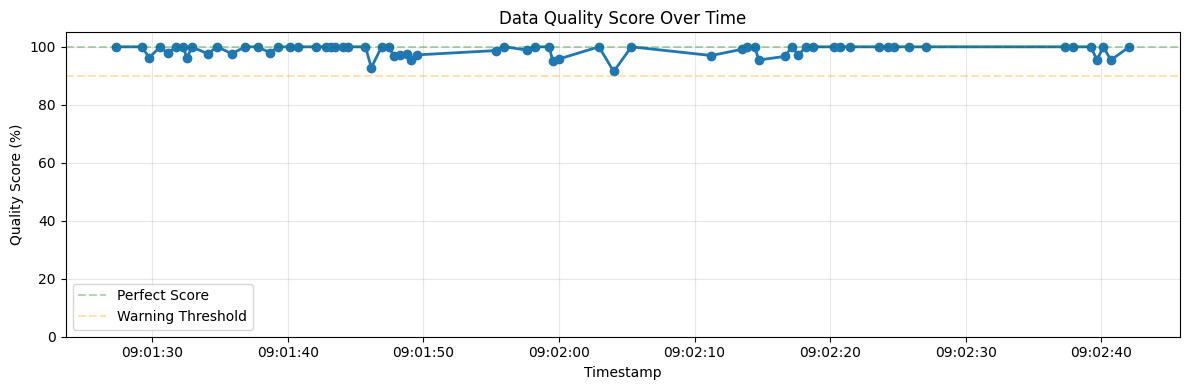


❌ Failed Files (24 total):


,timestamp,file,score
41,2025-12-06 09:02:04.035351,aims_assetclassrelationships.parquet,91.489362
25,2025-12-06 09:01:46.152293,aims_assethierarchymap.parquet,92.857143
38,2025-12-06 09:01:59.540392,aims_productlinks.parquet,95.000000
66,2025-12-06 09:02:40.717089,aims_informationneedstatusupd.parquet,95.454545
47,2025-12-06 09:02:14.734051,aims_informationpackages.parquet,95.454545
64,2025-12-06 09:02:39.689224,aims_consentlinks.parquet,95.454545
31,2025-12-06 09:01:49.093375,aims_workbankworkorders.parquet,95.454545
39,2025-12-06 09:02:00.005125,aims_productassetclasses.parquet,95.833333
7,2025-12-06 09:01:32.568201,aims_projectitemlinks.parquet,96.153846
2,2025-12-06 09:01:29.768851,aims_organisations.parquet,96.296296


In [25]:
# Step 4: Data Quality Monitoring Dashboard
print("\n" + "="*60)
print("📊 DATA QUALITY DASHBOARD")
print("="*60)

if DQ_LOG_FILE.exists():
    # Read all DQ logs
    logs = []
    with open(DQ_LOG_FILE, 'r') as f:
        for line in f:
            if line.strip():
                logs.append(json.loads(line))
    
    if logs:
        df_logs = pd.DataFrame(logs)
        df_logs['timestamp'] = pd.to_datetime(df_logs['timestamp'])
        
        # --- HIGH-LEVEL METRICS ---
        total_runs = len(df_logs)
        passed_runs = len(df_logs[df_logs['status'] == 'PASSED'])
        failed_runs = len(df_logs[df_logs['status'] == 'FAILED'])
        error_runs = len(df_logs[df_logs['status'] == 'ERROR'])
        avg_score = df_logs['score'].mean()
        
        print(f"\n📈 Summary Statistics:")
        print(f"   Total Validations: {total_runs}")
        print(f"   ✅ Passed: {passed_runs} ({passed_runs/total_runs*100:.1f}%)")
        print(f"   ❌ Failed: {failed_runs} ({failed_runs/total_runs*100:.1f}%)")
        print(f"   💥 Errors: {error_runs}")
        print(f"   📊 Average Quality Score: {avg_score:.1f}%")
        
        # --- RECENT ACTIVITY TABLE ---
        print("\n📋 Recent Validation Runs:")
        display_cols = ['timestamp', 'file', 'status', 'score']
        display(df_logs[display_cols].sort_values('timestamp', ascending=False).head(15))
        
        # --- TREND CHART ---
        if len(df_logs) > 1:
            print("\n📈 Quality Score Trend:")
            plt.figure(figsize=(12, 4))
            df_plot = df_logs.sort_values('timestamp')
            plt.plot(df_plot['timestamp'], df_plot['score'], marker='o', linestyle='-', linewidth=2)
            plt.axhline(y=100, color='g', linestyle='--', alpha=0.3, label='Perfect Score')
            plt.axhline(y=90, color='orange', linestyle='--', alpha=0.3, label='Warning Threshold')
            plt.title('Data Quality Score Over Time')
            plt.xlabel('Timestamp')
            plt.ylabel('Quality Score (%)')
            plt.ylim(0, 105)
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
        
        # --- FAILURES BREAKDOWN ---
        if failed_runs > 0:
            print(f"\n❌ Failed Files ({failed_runs} total):")
            failed_df = df_logs[df_logs['status'] == 'FAILED'][['timestamp', 'file', 'score']].copy()
            display(failed_df.sort_values('score'))
        
    else:
        print("\n⚠️  DQ log file exists but is empty.")
else:
    print("\n❌ DQ log file not found. Run Notebook 02 (Ingestion) first.")

In [26]:
# Step 5: Alerting System (Simulation)
print("\n" + "="*60)
print("🚨 ACTIVE ALERTS")
print("="*60)

if 'df_logs' in locals() and not df_logs.empty:
    # Filter for failures
    failures = df_logs[df_logs['status'] == 'FAILED'].copy()
    
    if not failures.empty:
        print(f"\n⚠️  Found {len(failures)} failed runs requiring attention.\n")
        
        for idx, (_, row) in enumerate(failures.iterrows(), 1):
            # Construct Alert Payload (for Slack/Teams/PagerDuty integration)
            alert_payload = {
                "alert_type": "DataQualityFailure",
                "severity": "High" if row['score'] < 70 else "Medium",
                "source": "AIMS_Ingestion_Pipeline",
                "timestamp": row['timestamp'].isoformat(),
                "file": row['file'],
                "score": row['score'],
                "failed_checks": row.get('details', {}).get('failed_count', 'Unknown'),
                "action_required": "Review quarantined file and fix data quality issues"
            }
            
            print(f"🔴 ALERT #{idx}: {row['file']}")
            print(f"   Severity: {alert_payload['severity']}")
            print(f"   Score: {row['score']:.1f}%")
            print(f"   Time: {row['timestamp']}")
            print(f"   Payload: {json.dumps(alert_payload, indent=2)}")
            print("-" * 60)
    else:
        print("\n✅ No active alerts. All validations passed!")
else:
    print("\n⚠️  No data available for alert analysis.")


🚨 ACTIVE ALERTS

⚠️  Found 24 failed runs requiring attention.

🔴 ALERT #1: aims_organisations.parquet
   Severity: Medium
   Score: 96.3%
   Time: 2025-12-06 09:01:29.768851
   Payload: {
  "alert_type": "DataQualityFailure",
  "severity": "Medium",
  "source": "AIMS_Ingestion_Pipeline",
  "timestamp": "2025-12-06T09:01:29.768851",
  "file": "aims_organisations.parquet",
  "score": 96.29629629629629,
  "failed_checks": 1,
  "action_required": "Review quarantined file and fix data quality issues"
}
------------------------------------------------------------
🔴 ALERT #2: aims_products.parquet
   Severity: Medium
   Score: 97.7%
   Time: 2025-12-06 09:01:31.130507
   Payload: {
  "alert_type": "DataQualityFailure",
  "severity": "Medium",
  "source": "AIMS_Ingestion_Pipeline",
  "timestamp": "2025-12-06T09:01:31.130507",
  "file": "aims_products.parquet",
  "score": 97.72727272727273,
  "failed_checks": 1,
  "action_required": "Review quarantined file and fix data quality issues"
}
----

In [27]:
# Step 6: Failure Analysis - Deep Dive into Failed Expectations
print("\n" + "="*60)
print("🔍 FAILURE ANALYSIS - Root Cause Breakdown")
print("="*60)

if 'df_logs' in locals() and not df_logs.empty:
    failures = df_logs[df_logs['status'] == 'FAILED'].copy()
    
    if not failures.empty:
        # Aggregate failure patterns
        all_failures = []
        for _, row in failures.iterrows():
            file_name = row['file']
            details = row.get('details', {})
            failure_list = details.get('failures', [])
            
            for failure in failure_list[:5]:  # First 5 failures per file
                all_failures.append({
                    'file': file_name,
                    'column': failure.get('column', 'Unknown'),
                    'expectation': failure.get('expectation', 'Unknown'),
                    'unexpected_percent': failure.get('details', {}).get('unexpected_percent', 0)
                })
        
        if all_failures:
            df_failures = pd.DataFrame(all_failures)
            
            # Most problematic columns
            print("\n📊 Most Problematic Columns:")
            column_issues = df_failures['column'].value_counts().head(10)
            print(column_issues.to_string())
            
            # Most common expectation failures
            print("\n⚠️  Most Common Failed Expectations:")
            expectation_issues = df_failures['expectation'].value_counts().head(10)
            print(expectation_issues.to_string())
            
            # Detailed failure table
            print("\n📋 Detailed Failure Breakdown:")
            display(df_failures.head(20))
        else:
            print("\n⚠️  No detailed failure information available.")
    else:
        print("\n✅ No failures to analyze!")
else:
    print("\n⚠️  No data available for failure analysis.")


🔍 FAILURE ANALYSIS - Root Cause Breakdown

📊 Most Problematic Columns:
column
N/A                     13
OWNERID                  2
RELATIONSHIPTYPEID       1
CONTRACTORTOCOMPLETE     1
ATTRIBUTEGROUPID         1
PARENTID                 1
OSGBNORTHING             1
OSGBEASTING              1
ASSETID                  1
REQUIREDATSTAGEID        1

⚠️  Most Common Failed Expectations:
expectation
expect_column_values_to_not_be_null     16
expect_table_row_count_to_be_between    13
expect_column_values_to_be_unique        5

📋 Detailed Failure Breakdown:


,file,column,expectation,unexpected_percent
0,aims_organisations.parquet,OWNERID,expect_column_values_to_not_be_null,3.571429
1,aims_products.parquet,N/A,expect_table_row_count_to_be_between,0.000000
2,aims_projectitemlinks.parquet,N/A,expect_table_row_count_to_be_between,0.000000
3,aims_links.parquet,LINKTYPEID,expect_column_values_to_not_be_null,1.470434
4,aims_people.parquet,USERID,expect_column_values_to_be_unique,0.632244
5,aims_workorders.parquet,N/A,expect_table_row_count_to_be_between,0.000000
6,aims_assethierarchymap.parquet,DESCENDANTASSETID,expect_column_values_to_be_unique,6.040000
7,aims_informationneeddocs.parquet,N/A,expect_table_row_count_to_be_between,0.000000
8,aims_workbanks.parquet,N/A,expect_table_row_count_to_be_between,0.000000
9,aims_productcharacteristics.parquet,N/A,expect_table_row_count_to_be_between,0.000000


In [28]:
# Step 7: Processing Speed & Performance Metrics
print("\n" + "="*60)
print("⚡ PERFORMANCE METRICS")
print("="*60)

if 'df_logs' in locals() and not df_logs.empty:
    # Calculate processing rate
    df_logs_sorted = df_logs.sort_values('timestamp')
    
    if len(df_logs_sorted) > 1:
        time_span = (df_logs_sorted['timestamp'].max() - df_logs_sorted['timestamp'].min()).total_seconds()
        files_per_minute = (len(df_logs) / time_span) * 60 if time_span > 0 else 0
        
        print(f"\n📈 Processing Statistics:")
        print(f"   Total Files Processed: {len(df_logs)}")
        print(f"   Processing Time Span: {time_span:.1f} seconds")
        print(f"   Average Rate: {files_per_minute:.2f} files/minute")
        print(f"   Average Time per File: {time_span/len(df_logs):.2f} seconds")
        
        # Score distribution
        print(f"\n📊 Quality Score Distribution:")
        print(f"   100% (Perfect): {len(df_logs[df_logs['score'] == 100])} files")
        print(f"   95-99%: {len(df_logs[(df_logs['score'] >= 95) & (df_logs['score'] < 100)])} files")
        print(f"   90-94%: {len(df_logs[(df_logs['score'] >= 90) & (df_logs['score'] < 95)])} files")
        print(f"   Below 90%: {len(df_logs[df_logs['score'] < 90])} files")
    else:
        print("\n⚠️  Not enough data for performance analysis.")
else:
    print("\n⚠️  No data available for performance analysis.")


⚡ PERFORMANCE METRICS

📈 Processing Statistics:
   Total Files Processed: 68
   Processing Time Span: 74.7 seconds
   Average Rate: 54.59 files/minute
   Average Time per File: 1.10 seconds

📊 Quality Score Distribution:
   100% (Perfect): 44 files
   95-99%: 22 files
   90-94%: 2 files
   Below 90%: 0 files


In [29]:
# Step 8: Historical Comparison (if multiple runs)
print("\n" + "="*60)
print("📅 HISTORICAL COMPARISON")
print("="*60)

if 'df_logs' in locals() and not df_logs.empty:
    # Group by date
    df_logs['date'] = df_logs['timestamp'].dt.date
    daily_stats = df_logs.groupby('date').agg({
        'score': ['mean', 'min', 'max', 'count'],
        'status': lambda x: (x == 'FAILED').sum()
    }).round(2)
    
    daily_stats.columns = ['Avg_Score', 'Min_Score', 'Max_Score', 'Total_Files', 'Failed_Files']
    
    print("\n📊 Daily Quality Metrics:")
    display(daily_stats)
    
    # Trend indicator
    if len(daily_stats) > 1:
        recent_avg = daily_stats['Avg_Score'].iloc[-1]
        previous_avg = daily_stats['Avg_Score'].iloc[-2]
        trend = "📈 Improving" if recent_avg > previous_avg else "📉 Declining" if recent_avg < previous_avg else "➡️  Stable"
        print(f"\n🎯 Trend: {trend}")
        print(f"   Previous Average: {previous_avg:.1f}%")
        print(f"   Current Average: {recent_avg:.1f}%")
        print(f"   Change: {recent_avg - previous_avg:+.1f}%")
else:
    print("\n⚠️  No data available for historical comparison.")


📅 HISTORICAL COMPARISON

📊 Daily Quality Metrics:


,Avg_Score,Min_Score,Max_Score,Total_Files,Failed_Files
date,,,,,
2025-12-06,98.78,91.49,100.0,68,24


In [30]:
# Step 9: Data Freshness Check
print("\n" + "="*60)
print("🕐 DATA FRESHNESS CHECK")
print("="*60)

from datetime import datetime, timedelta

if WATERMARK_FILE.exists():
    with open(WATERMARK_FILE, 'r') as f:
        watermarks = json.load(f)
    
    if watermarks:
        # Find most recent and oldest processed files
        timestamps = [pd.to_datetime(v) for v in watermarks.values()]
        most_recent = max(timestamps)
        oldest = min(timestamps)
        
        time_since_last = datetime.now() - most_recent.to_pydatetime()
        
        print(f"\n📅 Freshness Metrics:")
        print(f"   Most Recent Ingestion: {most_recent}")
        print(f"   Time Since Last Ingestion: {time_since_last}")
        print(f"   Oldest Processed File: {oldest}")
        
        # Alert if data is stale (older than 24 hours)
        if time_since_last > timedelta(hours=24):
            print(f"\n⚠️  WARNING: Data is stale (>24h since last ingestion)")
            print(f"   Consider running Notebook 02 to process new data")
        elif time_since_last > timedelta(hours=12):
            print(f"\n⚡ NOTICE: Data approaching staleness (>12h since last ingestion)")
        else:
            print(f"\n✅ Data is fresh (<12h since last ingestion)")
    else:
        print("\n⚠️  No processed files found.")
else:
    print("\n❌ Watermark file not found.")


🕐 DATA FRESHNESS CHECK

📅 Freshness Metrics:
   Most Recent Ingestion: 2025-12-06 09:02:42.076163
   Time Since Last Ingestion: 0:17:33.175390
   Oldest Processed File: 2025-12-06 09:01:27.339256

✅ Data is fresh (<12h since last ingestion)


In [31]:
# Step 10: Export Summary Report
print("\n" + "="*60)
print("📄 EXPORT SUMMARY REPORT")
print("="*60)

if 'df_logs' in locals() and not df_logs.empty:
    # Generate summary report
    report_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    report_file = STATE_DIR / f"dq_report_{datetime.now().strftime('%Y%m%d_%H%M%S')}.json"
    
    summary_report = {
        "report_generated_at": report_time,
        "summary": {
            "total_validations": len(df_logs),
            "passed": len(df_logs[df_logs['status'] == 'PASSED']),
            "failed": len(df_logs[df_logs['status'] == 'FAILED']),
            "errors": len(df_logs[df_logs['status'] == 'ERROR']),
            "average_score": float(df_logs['score'].mean()),
            "min_score": float(df_logs['score'].min()),
            "max_score": float(df_logs['score'].max())
        },
        "failed_files": df_logs[df_logs['status'] == 'FAILED']['file'].tolist(),
        "passed_files": df_logs[df_logs['status'] == 'PASSED']['file'].tolist()
    }
    
    with open(report_file, 'w') as f:
        json.dump(summary_report, f, indent=2)
    
    print(f"\n✅ Summary report exported to:")
    print(f"   {report_file}")
    print(f"\n📊 Report includes:")
    print(f"   - Summary statistics")
    print(f"   - List of passed files ({len(summary_report['passed_files'])} files)")
    print(f"   - List of failed files ({len(summary_report['failed_files'])} files)")
else:
    print("\n⚠️  No data available to export.")


📄 EXPORT SUMMARY REPORT

✅ Summary report exported to:
   /home/sanmi/Documents/HS2/HS2_PROJECTS_2025/AIMS_LOCAL/data/state/dq_report_20251206_092015.json

📊 Report includes:
   - Summary statistics
   - List of passed files (44 files)
   - List of failed files (24 files)


In [33]:
# Step 15: Performance Metrics Dashboard
print("\n" + "="*60)
print("⚡ PERFORMANCE ANALYTICS")
print("="*60)

if 'df_logs' in locals() and not df_logs.empty:
    
    df_perf = df_logs.sort_values('timestamp').copy()
    df_perf['file_number'] = range(1, len(df_perf) + 1)
    
    # Calculate cumulative stats
    df_perf['cumulative_avg_score'] = df_perf['score'].expanding().mean()
    df_perf['cumulative_pass_rate'] = (
        (df_perf['status'] == 'PASSED').cumsum() / df_perf['file_number'] * 100
    )
    
    # Create performance dashboard
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Cumulative Average Score', 'Cumulative Pass Rate',
                       'Processing Speed (files per minute)', 'Score Stability'),
        specs=[[{'type': 'scatter'}, {'type': 'scatter'}],
               [{'type': 'scatter'}, {'type': 'scatter'}]],
        vertical_spacing=0.12,
        horizontal_spacing=0.1
    )
    
    # Cumulative Average Score
    fig.add_trace(go.Scatter(
        x=df_perf['file_number'],
        y=df_perf['cumulative_avg_score'],
        mode='lines',
        name='Avg Score',
        line=dict(color='blue', width=2),
        fill='tozeroy',
        fillcolor='rgba(0,100,255,0.1)'
    ), row=1, col=1)
    
    # Cumulative Pass Rate
    fig.add_trace(go.Scatter(
        x=df_perf['file_number'],
        y=df_perf['cumulative_pass_rate'],
        mode='lines',
        name='Pass Rate',
        line=dict(color='green', width=2),
        fill='tozeroy',
        fillcolor='rgba(0,255,0,0.1)'
    ), row=1, col=2)
    
    # Processing Speed (moving average)
    if len(df_perf) > 5:
        df_perf['time_diff'] = df_perf['timestamp'].diff().dt.total_seconds()
        df_perf['files_per_min'] = 60 / df_perf['time_diff'].rolling(window=5).mean()
        
        fig.add_trace(go.Scatter(
            x=df_perf['file_number'],
            y=df_perf['files_per_min'],
            mode='lines',
            name='Speed',
            line=dict(color='orange', width=2)
        ), row=2, col=1)
    
    # Score Stability (rolling std)
    df_perf['score_stability'] = df_perf['score'].rolling(window=10).std()
    
    fig.add_trace(go.Scatter(
        x=df_perf['file_number'],
        y=df_perf['score_stability'],
        mode='lines',
        name='Stability',
        line=dict(color='purple', width=2),
        fill='tozeroy',
        fillcolor='rgba(128,0,128,0.1)'
    ), row=2, col=2)
    
    # Update layout
    fig.update_layout(
        title_text='<b>Performance Analytics Dashboard</b>',
        title_font_size=20,
        title_x=0.5,
        height=700,
        showlegend=False,
        template='plotly_white'
    )
    
    fig.update_xaxes(title_text='File Number', row=1, col=1)
    fig.update_xaxes(title_text='File Number', row=1, col=2)
    fig.update_xaxes(title_text='File Number', row=2, col=1)
    fig.update_xaxes(title_text='File Number', row=2, col=2)
    
    fig.update_yaxes(title_text='Score (%)', row=1, col=1)
    fig.update_yaxes(title_text='Pass Rate (%)', row=1, col=2)
    fig.update_yaxes(title_text='Files/Min', row=2, col=1)
    fig.update_yaxes(title_text='Std Dev', row=2, col=2)
    
    fig.show()
    
    print("\n💡 These metrics show how quality and performance evolve over time")
    
else:
    print("\n⚠️  No data available.")


⚡ PERFORMANCE ANALYTICS


NameError: name 'make_subplots' is not defined

In [ ]:
# Step 14: Timeline Visualization - Processing Activity
print("\n" + "="*60)
print("📅 PROCESSING TIMELINE")
print("="*60)

if 'df_logs' in locals() and not df_logs.empty:
    
    df_timeline = df_logs.copy()
    df_timeline['hover_text'] = (
        '<b>' + df_timeline['file'] + '</b><br>' +
        'Status: ' + df_timeline['status'] + '<br>' +
        'Score: ' + df_timeline['score'].astype(str) + '%<br>' +
        'Time: ' + df_timeline['timestamp'].astype(str)
    )
    
    # Color mapping
    color_map = {'PASSED': 'green', 'FAILED': 'red', 'ERROR': 'orange'}
    df_timeline['color'] = df_timeline['status'].map(color_map)
    
    # Create timeline scatter plot
    fig = px.scatter(
        df_timeline,
        x='timestamp',
        y='score',
        color='status',
        size=[10] * len(df_timeline),
        hover_name='file',
        hover_data={
            'timestamp': True,
            'score': ':.1f',
            'status': True
        },
        color_discrete_map=color_map,
        title='<b>Processing Timeline - All Validation Events</b>'
    )
    
    # Add annotations for failed files
    failed_files = df_timeline[df_timeline['status'] == 'FAILED']
    if not failed_files.empty:
        for idx, row in failed_files.head(5).iterrows():
            fig.add_annotation(
                x=row['timestamp'],
                y=row['score'],
                text=row['file'][:20],
                showarrow=True,
                arrowhead=2,
                arrowsize=1,
                arrowwidth=1,
                arrowcolor='red',
                ax=40,
                ay=-40,
                bgcolor='rgba(255,255,255,0.8)',
                bordercolor='red',
                font=dict(size=9)
            )
    
    fig.update_layout(
        height=500,
        title_font_size=20,
        title_x=0.5,
        xaxis_title='Timestamp',
        yaxis_title='Quality Score (%)',
        hovermode='closest',
        template='plotly_white'
    )
    
    fig.update_yaxes(range=[0, 105])
    
    fig.show()
    
    print("\n💡 Hover over points to see file details. Red annotations show failed files.")
    
else:
    print("\n⚠️  No data available.")

In [ ]:
# Step 13: Failure Heatmap - Visual Root Cause Analysis
print("\n" + "="*60)
print("🔥 FAILURE HEATMAP")
print("="*60)

if 'df_logs' in locals() and not df_logs.empty:
    failures = df_logs[df_logs['status'] == 'FAILED'].copy()
    
    if not failures.empty:
        # Extract failure details
        all_failures = []
        for _, row in failures.iterrows():
            file_name = row['file']
            details = row.get('details', {})
            failure_list = details.get('failures', [])
            
            for failure in failure_list[:10]:
                all_failures.append({
                    'file': file_name[:30] + '...' if len(file_name) > 30 else file_name,
                    'column': failure.get('column', 'Unknown'),
                    'expectation': failure.get('expectation', 'Unknown')[:40],
                    'severity': 'High' if failure.get('details', {}).get('unexpected_percent', 0) > 10 else 'Medium'
                })
        
        if all_failures:
            df_failures = pd.DataFrame(all_failures)
            
            # Create pivot for heatmap
            failure_matrix = df_failures.groupby(['column', 'expectation']).size().reset_index(name='count')
            pivot_data = failure_matrix.pivot_table(
                index='expectation', 
                columns='column', 
                values='count', 
                fill_value=0
            )
            
            # Create heatmap
            fig = go.Figure(data=go.Heatmap(
                z=pivot_data.values,
                x=pivot_data.columns,
                y=pivot_data.index,
                colorscale='Reds',
                text=pivot_data.values,
                texttemplate='%{text}',
                textfont={"size": 10},
                hovertemplate='Column: %{x}<br>Expectation: %{y}<br>Failures: %{z}<extra></extra>'
            ))
            
            fig.update_layout(
                title='<b>Failure Heatmap: Column vs Expectation Type</b>',
                title_font_size=20,
                title_x=0.5,
                xaxis_title='Column Name',
                yaxis_title='Failed Expectation',
                height=max(400, len(pivot_data) * 30),
                xaxis={'side': 'bottom'},
                font=dict(size=10)
            )
            
            fig.show()
            
            print("\n💡 Darker colors indicate more frequent failures")
        else:
            print("\n⚠️  No detailed failure information available.")
    else:
        print("\n✅ No failures to visualize!")
else:
    print("\n⚠️  No data available.")

In [ ]:
# Step 12: Interactive File Explorer with Drill-Down
print("\n" + "="*60)
print("🔍 INTERACTIVE FILE EXPLORER")
print("="*60)

if 'df_logs' in locals() and not df_logs.empty:
    
    # Create sunburst chart for file status exploration
    df_viz = df_logs.copy()
    df_viz['score_category'] = pd.cut(
        df_viz['score'], 
        bins=[0, 70, 90, 100], 
        labels=['Critical (<70%)', 'Warning (70-90%)', 'Healthy (90-100%)']
    )
    
    # Add a root level
    df_viz['root'] = 'All Files'
    
    fig = px.sunburst(
        df_viz,
        path=['root', 'status', 'score_category', 'file'],
        values='score',
        color='score',
        color_continuous_scale='RdYlGn',
        range_color=[0, 100],
        title='<b>File Status Explorer - Click to Drill Down</b>',
        hover_data={'score': ':.1f'}
    )
    
    fig.update_layout(
        height=600,
        font=dict(size=12),
        title_font_size=20,
        title_x=0.5
    )
    
    fig.show()
    
    print("\n💡 Tip: Click on segments to drill down into specific categories!")
    
else:
    print("\n⚠️  No data available.")

In [ ]:
# Step 11: Interactive Dashboard with Plotly
print("\n" + "="*60)
print("📊 INTERACTIVE DASHBOARD")
print("="*60)

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

if 'df_logs' in locals() and not df_logs.empty:
    
    # === 1. KPI Cards with Gauges ===
    total_runs = len(df_logs)
    passed_runs = len(df_logs[df_logs['status'] == 'PASSED'])
    failed_runs = len(df_logs[df_logs['status'] == 'FAILED'])
    avg_score = df_logs['score'].mean()
    pass_rate = (passed_runs / total_runs * 100) if total_runs > 0 else 0
    
    # Create figure with subplots
    fig = make_subplots(
        rows=2, cols=3,
        subplot_titles=('Pass Rate Gauge', 'Average Score Gauge', 'Processing Status',
                       'Quality Score Trend', 'Score Distribution', 'Failure Breakdown'),
        specs=[[{'type': 'indicator'}, {'type': 'indicator'}, {'type': 'pie'}],
               [{'type': 'scatter', 'colspan': 2}, None, {'type': 'bar'}]],
        row_heights=[0.4, 0.6],
        vertical_spacing=0.15,
        horizontal_spacing=0.1
    )
    
    # Gauge 1: Pass Rate
    fig.add_trace(go.Indicator(
        mode="gauge+number+delta",
        value=pass_rate,
        title={'text': f"Pass Rate<br><span style='font-size:0.8em;color:gray'>{passed_runs}/{total_runs} files</span>"},
        delta={'reference': 90, 'increasing': {'color': "green"}},
        gauge={
            'axis': {'range': [None, 100], 'tickwidth': 1},
            'bar': {'color': "darkgreen" if pass_rate >= 90 else "orange" if pass_rate >= 70 else "red"},
            'steps': [
                {'range': [0, 70], 'color': "lightgray"},
                {'range': [70, 90], 'color': "lightyellow"},
                {'range': [90, 100], 'color': "lightgreen"}],
            'threshold': {
                'line': {'color': "red", 'width': 4},
                'thickness': 0.75,
                'value': 90}}
    ), row=1, col=1)
    
    # Gauge 2: Average Quality Score
    fig.add_trace(go.Indicator(
        mode="gauge+number",
        value=avg_score,
        title={'text': "Avg Quality Score"},
        gauge={
            'axis': {'range': [0, 100]},
            'bar': {'color': "darkblue"},
            'steps': [
                {'range': [0, 70], 'color': "lightcoral"},
                {'range': [70, 90], 'color': "lightyellow"},
                {'range': [90, 100], 'color': "lightgreen"}],
        }
    ), row=1, col=2)
    
    # Pie Chart: Status Distribution
    status_counts = df_logs['status'].value_counts()
    colors_map = {'PASSED': 'green', 'FAILED': 'red', 'ERROR': 'orange'}
    fig.add_trace(go.Pie(
        labels=status_counts.index,
        values=status_counts.values,
        marker=dict(colors=[colors_map.get(s, 'gray') for s in status_counts.index]),
        hole=0.3,
        textinfo='label+percent',
        textposition='inside'
    ), row=1, col=3)
    
    # Line Chart: Quality Score Trend Over Time
    df_sorted = df_logs.sort_values('timestamp')
    fig.add_trace(go.Scatter(
        x=df_sorted['timestamp'],
        y=df_sorted['score'],
        mode='lines+markers',
        name='Quality Score',
        line=dict(color='blue', width=2),
        marker=dict(size=6, color=df_sorted['score'], 
                   colorscale='RdYlGn', showscale=True,
                   cmin=0, cmax=100),
        hovertemplate='<b>%{x}</b><br>Score: %{y:.1f}%<extra></extra>'
    ), row=2, col=1)
    
    # Add reference lines
    fig.add_hline(y=100, line_dash="dash", line_color="green", 
                  annotation_text="Perfect", row=2, col=1)
    fig.add_hline(y=90, line_dash="dash", line_color="orange", 
                  annotation_text="Warning", row=2, col=1)
    
    # Bar Chart: Score Distribution
    score_bins = pd.cut(df_logs['score'], bins=[0, 70, 90, 95, 100], 
                        labels=['<70%', '70-90%', '90-95%', '95-100%'])
    score_dist = score_bins.value_counts().sort_index()
    
    bar_colors = ['red', 'orange', 'lightgreen', 'darkgreen']
    fig.add_trace(go.Bar(
        x=score_dist.index,
        y=score_dist.values,
        marker_color=bar_colors,
        text=score_dist.values,
        textposition='outside',
        hovertemplate='<b>%{x}</b><br>Files: %{y}<extra></extra>'
    ), row=2, col=3)
    
    # Update layout
    fig.update_layout(
        title_text="<b>AIMS Data Quality Dashboard</b>",
        title_font_size=24,
        title_x=0.5,
        showlegend=False,
        height=800,
        template='plotly_white'
    )
    
    fig.update_xaxes(title_text="Timestamp", row=2, col=1)
    fig.update_yaxes(title_text="Quality Score (%)", row=2, col=1, range=[0, 105])
    fig.update_xaxes(title_text="Score Range", row=2, col=3)
    fig.update_yaxes(title_text="Number of Files", row=2, col=3)
    
    fig.show()
    
else:
    print("\n⚠️  No data available for dashboard.")